In [2]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportion_effectsize
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.html

### 计算样本量

#### 均值

In [3]:
# effect size: standardized effect size, difference between the two means divided by the standard deviation. effect_size has to be positive.
m1 = 100
m2 = 200
sd = 500 
es = (m2-m1)/sd
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = es, ratio=1, alpha = 0.05, power = 0.8, alternative = 'two-sided')
print(round(sample_size))

393


#### 比例

In [4]:
# statsmodels.stats.proportion.proportion_effectsize
# only method=’normal’ is implemented to match pwr.p2.test see http://www.statmethods.net/stats/power.html
# Effect size for normal is defined as
# 2 * (arcsin(sqrt(prop1)) - arcsin(sqrt(prop2)))
es = proportion_effectsize(prop1=0.05, prop2=0.06)
sample_size = power_analysis.solve_power(effect_size=es, ratio=1, alpha=0.05, power=0.8, alternative = 'two-sided')
print(round(sample_size))

8144


### 功效

In [5]:
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size = 0.2, alpha = 0.05, nobs1 = 393, ratio = 1, alternative = 'two-sided')
print(round(power, 2))

0.8


### 效应量

In [6]:
# Cohen's d effect size
mu1 = 2.1 
mu2 = 1.9 
s1 = 0.6
s2 = 0.5 
n1 = 400 
n2 = 400 

s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # pooled standard deviation
d = (mu1 - mu2) / s #Cohen's d effect size
# Print results
print(round(d, 2))

0.27


### 样本量 vs 功效

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26679 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21151 missing from c

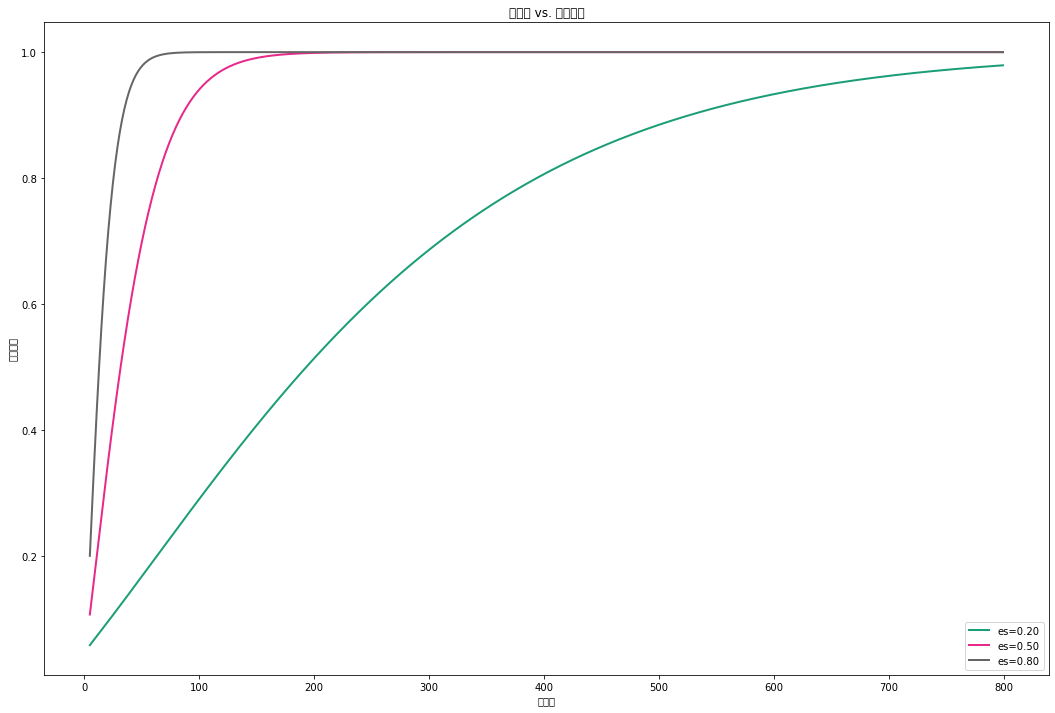

In [7]:
power_analysis = TTestIndPower()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 12))
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 800),
                          effect_size=np.array([0.2, 0.5, 0.8]),
                          alpha=0.05,
                          ax=ax,
                          title='样本量 vs. 统计功效')
ax.set_xlabel('样本量')
ax.set_ylabel('统计功效')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26679 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21151 missing from c

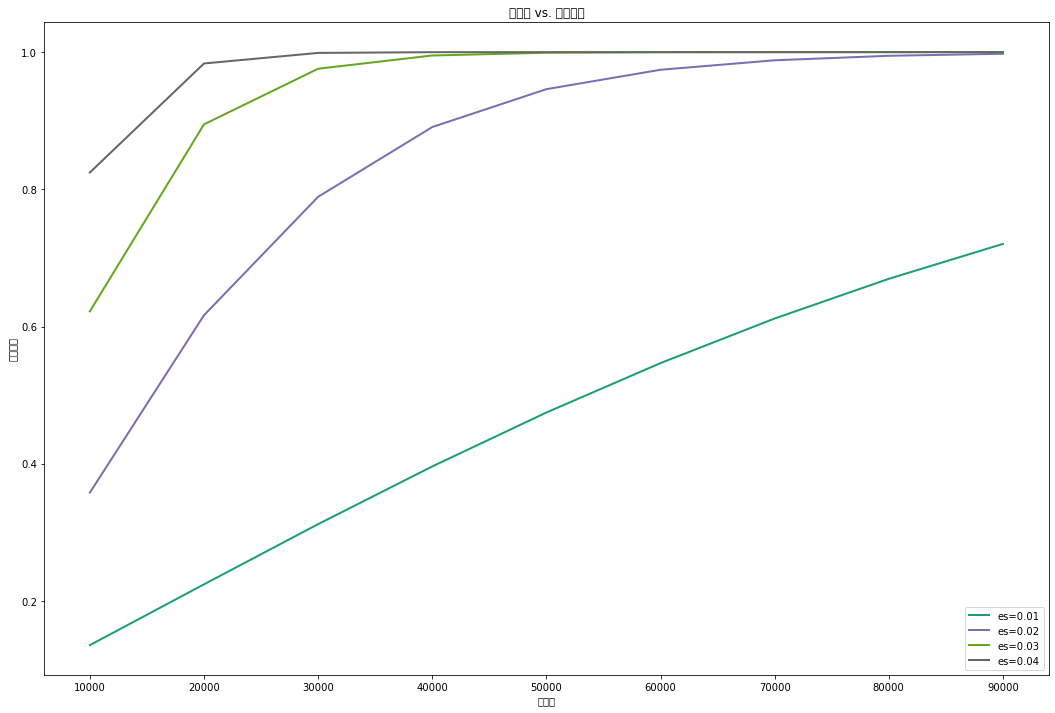

In [8]:
p1 = 0.0015
p2s = np.arange(0.0020, 0.004, step=0.0005)
es = np.array([proportion_effectsize(prop1=p2, prop2=p1) for p2 in p2s])
power_analysis = TTestIndPower()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 12))
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(10000, 100000, step=10000),
                          effect_size=es,
                          alpha=0.05,
                          ax=ax,
                          title='样本量 vs. 统计功效')
ax.set_xlabel('样本量')
ax.set_ylabel('统计功效')
plt.show()